# KNN的过程


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
raw_data_X = [[3.393533211,2.331273381],
              [3.110073483,1.781539638],
              [1.343808831,3.368360954],
              [3.582294042,4.679179110],
              [2.280362439,2.866990263],
              [7.423436942,4.696522875],
              [5.745051997,3.533989803],
              [9.172168622,2.511101045],
              [7.792783481,3.424088941],
              [7.939820817,0.791637231]
             ]
raw_data_y = [0,0,0,0,0,1,1,1,1,1]

In [3]:
X_train = np.array(raw_data_X)
y_train = np.array(raw_data_y)

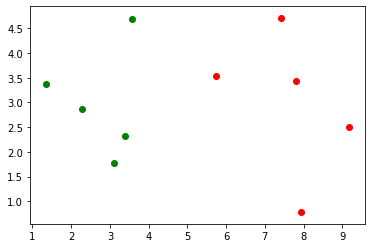

In [4]:
plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1], color = 'g')
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1], color = 'r')
plt.show()

In [5]:
x = np.array([8.093607318, 3.365731514])

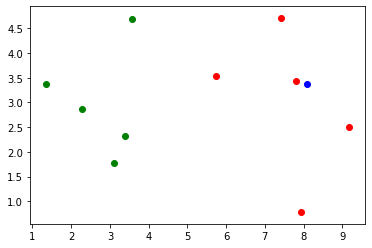

In [6]:
plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1], color = 'g')
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1], color = 'r')
plt.scatter(x[0],x[1], color = 'b')
plt.show()

In [7]:
from math import sqrt 
distances = []
for x_train in X_train:
    d = sqrt(np.sum((x_train - x)**2))
    distances.append(d)

In [8]:
distances

[4.812566907609877,
 5.229270827235305,
 6.749798999160064,
 4.6986266144110695,
 5.83460014556857,
 1.4900114024329525,
 2.354574897431513,
 1.3761132675144652,
 0.3064319992975,
 2.5786840957478887]

In [9]:
# 一句话表达
distances = [sqrt(np.sum((x_train - x)**2)) for x_train in X_train]
distances

[4.812566907609877,
 5.229270827235305,
 6.749798999160064,
 4.6986266144110695,
 5.83460014556857,
 1.4900114024329525,
 2.354574897431513,
 1.3761132675144652,
 0.3064319992975,
 2.5786840957478887]

In [10]:
# argsort 对数组进行排序，返回其索引
np.argsort(distances)

array([8, 7, 5, 6, 9, 3, 0, 1, 4, 2], dtype=int64)

In [11]:
nearest = np.argsort(distances)

In [12]:
k = 6

In [13]:
topK_y = [y_train[i] for i in nearest[:k]]
topK_y

[1, 1, 1, 1, 1, 0]

In [14]:
from collections import Counter
votes = Counter(topK_y)

In [15]:
# 取票数最多的1个元素
votes.most_common(1)

[(1, 5)]

In [16]:
# votes.most_common(1)[0]是一个元组
predict_y = votes.most_common(1)[0][0]
predict_y

1

# 训练集、测试集划分
## 燕尾花数据集

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [18]:
iris = datasets.load_iris()

In [19]:
X = iris.data
y = iris.target
print(X.shape)
print(y.shape)

(150, 4)
(150,)


## 训练集、测试集划分

In [20]:
# y的分布是按顺序的
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### 数据的随机化处理

In [21]:
shuffle_indexes = np.random.permutation(len(X))
shuffle_indexes

array([135,  82, 140,  10,  49, 149, 145,  33,  42,  64,  71,  15,  41,
        70,  56,  97,  39,  31,  17, 147, 143,  18,  68, 122, 133, 104,
        30,  55,  37,  65,  19, 107, 101, 115, 100,  98,  20,  59,  29,
        76, 110, 120, 134,  47,  99,   9,  89, 130,  74, 132, 108,  69,
       119,  25,  91, 136, 109, 138,  23,  94,   1,  16, 148,  44, 124,
        88,  43, 139,  14,  12,  48,  96,  36, 131,  35,  67, 127,  11,
       123,  50,  51, 114,  86,   2,  93,  32,  61,  62, 129,  26,   4,
        66,  81,  40,  77,  53,  24,  87,  46, 116,   8,  95,  85,   7,
        45,  75, 146,   5,  57,  78, 125,  54, 103,  90, 121,  72,  34,
       117,  38,  73, 144,  84,   0,   6, 106,  28,  27,  58,  80,  21,
        83, 113, 112, 141,   3, 142,  63,  22,  60, 128, 126,  79, 118,
       137, 105, 102,  92, 111,  13,  52])

In [22]:
test_ratio = 0.2
test_size = int(len(X) * test_ratio)
test_size

30

In [23]:
# 前30个测试
test_indexes = shuffle_indexes[:test_size]
train_indexes = shuffle_indexes[test_size:]

In [24]:
X_train = X[train_indexes]
y_train = y[train_indexes]

X_test = X[test_indexes]
y_test = y[test_indexes]

print(X_train.shape)
print(y_train.shape)

(120, 4)
(120,)


## 使用我们自己的KNN

In [25]:
from algorithm.model_selection import train_test_split

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [27]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


In [28]:
from algorithm.kNN import KNNClassifier

In [29]:
my_knn_clf = KNNClassifier(k=3)

In [30]:
my_knn_clf.fit(X_train,y_train)

KNN(k=3)

In [31]:
y_predict = my_knn_clf.predict(X_test)

In [32]:
y_predict

array([1, 0, 1, 1, 2, 2, 0, 1, 2, 2, 1, 2, 1, 2, 0, 1, 1, 2, 1, 0, 1, 1,
       0, 2, 0, 2, 2, 0, 1, 2])

In [33]:
sum(y_predict == y_test)

30

In [34]:
score = sum(y_predict == y_test)/len(y_predict)

In [35]:
score

1.0

## 使用sklearn训练

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=666)

In [38]:
print(X_train.shape)
print(y_train.shape)

(120, 4)
(120,)


# 分类准确度
## 手写数字数据集

In [39]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets

In [40]:
# digits 是一个字典
digits = datasets.load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [41]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [42]:
X = digits.data
X.shape

(1797, 64)

In [43]:
y = digits.target
y.shape

(1797,)

In [44]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [45]:
# y的前100个数据
y[:100]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
       2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9, 8, 9, 8, 4, 1, 7,
       7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3, 3, 7, 3, 3, 4, 6,
       6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7, 6, 3, 2, 1, 7, 4,
       6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1])

In [46]:
# X的前10个元素
X[:10]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [47]:
X[10:]

array([[ 0.,  0.,  1., ...,  3.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  1.,  0.],
       [ 0.,  0.,  5., ..., 13., 12.,  4.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

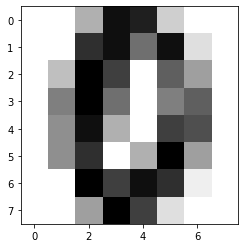

In [48]:
some_digit=X[666]
some_digit_image = some_digit.reshape(8,8) 
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary)
plt.show()

In [49]:
from algorithm.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_ration=0.2)

In [50]:
print(X.shape)

(1797, 64)


In [51]:
print(y.shape)

(1797,)


In [52]:
from algorithm.kNN import KNNClassifier

In [53]:
my_knn_clf = KNNClassifier(k=3)
my_knn_clf.fit(X_train,y_train)

KNN(k=3)

In [54]:
y_predict = my_knn_clf.predict(X_test)
y_predict

array([6, 4, 2, 7, 8, 5, 7, 3, 9, 8, 1, 6, 0, 2, 7, 6, 5, 8, 8, 1, 8, 4,
       8, 7, 8, 1, 0, 4, 5, 1, 3, 5, 1, 1, 8, 0, 8, 4, 7, 6, 8, 2, 0, 7,
       3, 8, 0, 5, 9, 5, 9, 8, 0, 6, 3, 7, 4, 5, 7, 6, 5, 6, 7, 1, 3, 0,
       4, 4, 6, 6, 0, 6, 0, 2, 2, 0, 2, 3, 0, 9, 3, 2, 7, 2, 8, 3, 9, 3,
       6, 7, 3, 4, 3, 9, 1, 3, 2, 1, 9, 6, 0, 3, 1, 4, 1, 5, 3, 6, 3, 0,
       9, 7, 8, 9, 9, 8, 7, 1, 6, 7, 3, 7, 5, 1, 3, 9, 7, 7, 6, 6, 4, 0,
       8, 2, 2, 8, 3, 0, 3, 0, 6, 6, 8, 4, 1, 1, 8, 4, 5, 6, 7, 2, 1, 6,
       7, 9, 4, 0, 8, 0, 2, 3, 4, 8, 7, 6, 2, 7, 9, 5, 1, 3, 6, 8, 1, 0,
       0, 9, 6, 1, 0, 2, 3, 5, 8, 5, 3, 5, 2, 5, 3, 2, 1, 3, 2, 1, 9, 5,
       2, 9, 0, 0, 2, 1, 4, 0, 5, 4, 6, 7, 5, 3, 1, 3, 5, 2, 8, 1, 7, 1,
       2, 0, 0, 0, 1, 0, 9, 5, 6, 3, 0, 1, 2, 5, 5, 5, 6, 0, 8, 7, 7, 9,
       4, 5, 2, 1, 5, 7, 0, 3, 3, 9, 5, 3, 1, 4, 9, 6, 8, 1, 3, 4, 4, 9,
       9, 4, 9, 2, 8, 7, 2, 2, 9, 8, 2, 6, 2, 3, 6, 5, 9, 3, 6, 1, 4, 1,
       1, 7, 9, 5, 7, 9, 7, 2, 1, 9, 7, 8, 4, 6, 2,

In [55]:
sum(y_predict == y_test)/len(y_test)

0.9805013927576601

In [56]:
print(y_test.shape[0])
print(y_predict.shape[0])

359
359


In [57]:
from playML.metrics import accuracy_score

In [58]:
print(y_test.shape[0])
print(y_predict.shape[0])
accuracy_score(y_test, y_predict)

359
359


0.9805013927576601

# 超参数
## 超参数入门

In [59]:
import numpy as np
from sklearn import datasets

In [60]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

In [62]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)
knn_clf.score(X_test, y_test)

0.9888888888888889

* 超参数： 在算法运行前需要决定的参数
* 模型参数： 算法过程中学习的参数

knn算法没有模型参数
KNN算法中的k是典型的超参数

## 寻找最好的k

In [63]:
best_score = 0.0
best_k = -1 
for k in range(1, 11):
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train, y_train)
    score = knn_clf.score(X_test, y_test)
    if score > best_score:
        best_k = k
        best_score = score
    
print("best_k =", best_k)
print("best_sscore =", best_score)

best_k = 4
best_sscore = 0.9916666666666667


## KNN的另外一个超参数 -- 权重
KNN有另外一个超参数 -- 权重

<div align="center"><img width="300px" src="imgs/knn-超参数-距离.PNG"></div>

* 考虑距离还能解决平票的问题

### 考虑不考虑距离

In [64]:
best_method = ""
best_score = 0.0
best_k = -1 
for method in ["uniform", "distance"]:
    for k in range(1, 11):
        knn_clf = KNeighborsClassifier(n_neighbors=k, weights=method)
        knn_clf.fit(X_train, y_train)
        score = knn_clf.score(X_test, y_test)
        if score > best_score:
            best_k = k
            best_score = score
            best_method = method
    
print("best_method =", best_method)
print("best_k =", best_k)
print("best_sscore =", best_score)

best_method = uniform
best_k = 4
best_sscore = 0.9916666666666667


### 关于距离的定义
* 欧拉距离
<div align="center"><img width="250px" src="imgs/knn-欧拉距离.PNG"></div>
* 曼哈顿距离
<div align="center"><img width="300px" src="imgs/knn-曼哈顿距离.PNG"></div>
* 明可夫斯基距离
<div align="center"><img width="250px" src="imgs/knn-明可夫斯基距离.PNG"></div>

### 明可夫斯基距离


In [66]:
%%time

best_p = -1       # p表示明可夫斯基中的p值
best_score = 0.0  # score表示分数
best_k = -1       # k表示KNN中的k

for k in range(1, 11):
    for p in range(1, 6):
        knn_clf = KNeighborsClassifier(n_neighbors=k, weights="distance", p=p)
        knn_clf.fit(X_train, y_train)
        score = knn_clf.score(X_test,y_test)
        if score > best_score:
            best_k = k
            best_score = score
            best_p = p
            
print("best_p = ",best_p)
print("best_k = ", best_k)
print("best_score =", best_score)
        

best_p =  2
best_k =  3
best_score = 0.9888888888888889
Wall time: 20 s


# 网格搜索 - Grid Search

In [67]:
param_grid = [
    {
        'weights': ['uniform'],
        'n_neighbors': [i for i in range(1, 11)]
    },
    {
        'weights': ['distance'],
        'n_neighbors': [i for i in range(1, 11)],
        'p': [i for i in range(1, 6)]
    } 
]

In [68]:
knn_clf = KNeighborsClassifier()

In [72]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(knn_clf, param_grid)

In [76]:
%%time
grid_search.fit(X_train, y_train)

Wall time: 1min 17s


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'weights': ['uniform']},
                         {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'p': [1, 2, 3, 4, 5], 'weights': ['distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [77]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [78]:
grid_search.best_score_

0.9860820751064653

* 【说明】  
    * 网格搜索出来的结果和明可夫斯基距离小节计算出来的结果有差异，主要原因是GridSearchCV中的CV:交叉验证
    * best_score_ ： 参数最后的字符是'_'  
        是一个代码原则（规范）：不是由用户传入的参数，而是由用户传入的参数我们计算得到的参数

In [79]:
knn_clf = grid_search.best_estimator_

In [80]:
knn_clf.predict(X_test)

array([8, 1, 3, 4, 4, 0, 7, 0, 8, 0, 4, 6, 1, 1, 2, 0, 1, 6, 7, 3, 3, 6,
       3, 2, 9, 4, 0, 2, 0, 3, 0, 8, 7, 2, 3, 5, 1, 3, 1, 5, 8, 6, 2, 6,
       3, 1, 3, 0, 0, 4, 9, 9, 2, 8, 7, 0, 5, 4, 0, 9, 5, 5, 9, 3, 4, 2,
       8, 8, 7, 1, 4, 3, 0, 2, 7, 2, 1, 2, 4, 0, 9, 0, 6, 6, 2, 0, 0, 5,
       4, 4, 3, 1, 3, 8, 6, 4, 4, 7, 5, 6, 8, 4, 8, 4, 6, 9, 7, 7, 0, 8,
       8, 3, 9, 7, 1, 8, 4, 2, 7, 0, 0, 4, 9, 6, 7, 3, 4, 6, 4, 8, 4, 7,
       2, 6, 5, 5, 8, 7, 2, 5, 5, 9, 7, 9, 3, 1, 9, 4, 4, 1, 5, 1, 6, 4,
       4, 8, 1, 6, 2, 5, 2, 1, 4, 4, 3, 9, 4, 0, 6, 0, 8, 3, 8, 7, 3, 0,
       3, 0, 5, 9, 2, 7, 1, 8, 1, 4, 3, 3, 7, 8, 2, 7, 2, 2, 8, 0, 5, 7,
       6, 7, 3, 4, 7, 1, 7, 0, 9, 2, 8, 9, 3, 8, 9, 1, 1, 1, 9, 8, 8, 0,
       3, 7, 3, 3, 4, 8, 2, 1, 8, 6, 0, 1, 7, 7, 5, 8, 3, 8, 7, 6, 8, 4,
       2, 6, 2, 3, 7, 4, 9, 3, 5, 0, 6, 3, 8, 3, 3, 1, 4, 5, 3, 2, 5, 6,
       8, 6, 9, 5, 5, 3, 6, 5, 9, 3, 7, 7, 0, 2, 4, 9, 9, 9, 2, 5, 6, 1,
       9, 6, 9, 7, 7, 4, 5, 0, 0, 5, 3, 8, 4, 4, 3,

In [81]:
knn_clf.score(X_test, y_test)

0.9833333333333333

In [83]:
%%time
# n_jobs表示计算的核数
# verbose=2表示训练过程中显式信息，n值越大，信息越详细
grid_search = GridSearchCV(knn_clf, param_grid, n_jobs=4, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done 250 tasks      | elapsed:   20.7s


Wall time: 26.9 s


[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:   26.7s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=1, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=4,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'weights': ['uniform']},
                         {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'p': [1, 2, 3, 4, 5], 'weights': ['distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [84]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

# 数据归一化

## 基本概念

【解决方案】将所有的数据映射到同一尺度

### 最值归一化 normalization
最值归一化：把所有数据映射到0-1之间
 
<div><img width="250px" src="imgs/knn-最值归一化.PNG"></div>

适用于分布有明显边界的情况；受outlier影响较大
比如：考试分数（0-100）

### 均方差归一化 standardization
均方差归一化：把所有数据归一到均值为0方差为1的分布中

<div><img width="250px" src="imgs/knn-均方差归一化.PNG"></div>

## 最值归一化 normalization

In [87]:
x = np.random.randint(0, 100, size=100)

In [88]:
x

array([60, 10, 45, 54, 73, 15,  6, 71, 83,  9, 82, 91, 41, 20, 35, 75, 69,
       80, 87, 82, 66, 46, 12, 89, 45, 30, 99, 62, 27, 17, 39, 65, 31, 40,
       44, 85, 95, 19, 49, 31,  6, 75, 49, 54, 41, 62, 29, 63, 37, 35, 70,
       94, 88, 74, 79, 99, 76, 92, 38, 90, 47, 55, 76, 23,  7, 60, 61, 54,
        6, 78, 91, 71, 63, 82, 31,  9, 43, 31, 78, 64,  2, 75, 37, 42, 74,
       41, 43, 83, 43, 88, 24,  1, 21, 57, 94, 94, 25, 30, 93,  5])

In [89]:
(x - np.min(x)) / (np.max(x) - np.min(x))

array([0.60204082, 0.09183673, 0.44897959, 0.54081633, 0.73469388,
       0.14285714, 0.05102041, 0.71428571, 0.83673469, 0.08163265,
       0.82653061, 0.91836735, 0.40816327, 0.19387755, 0.34693878,
       0.75510204, 0.69387755, 0.80612245, 0.87755102, 0.82653061,
       0.66326531, 0.45918367, 0.1122449 , 0.89795918, 0.44897959,
       0.29591837, 1.        , 0.62244898, 0.26530612, 0.16326531,
       0.3877551 , 0.65306122, 0.30612245, 0.39795918, 0.43877551,
       0.85714286, 0.95918367, 0.18367347, 0.48979592, 0.30612245,
       0.05102041, 0.75510204, 0.48979592, 0.54081633, 0.40816327,
       0.62244898, 0.28571429, 0.63265306, 0.36734694, 0.34693878,
       0.70408163, 0.94897959, 0.8877551 , 0.74489796, 0.79591837,
       1.        , 0.76530612, 0.92857143, 0.37755102, 0.90816327,
       0.46938776, 0.55102041, 0.76530612, 0.2244898 , 0.06122449,
       0.60204082, 0.6122449 , 0.54081633, 0.05102041, 0.78571429,
       0.91836735, 0.71428571, 0.63265306, 0.82653061, 0.30612

In [90]:
# (50, 2)表示50x2的矩阵
X = np.random.randint(0, 100, (50, 2))
X[:10,:]

array([[32, 71],
       [56, 68],
       [52, 53],
       [70,  2],
       [20, 89],
       [37, 24],
       [86, 12],
       [10, 86],
       [ 5,  2],
       [24, 32]])

In [91]:
# 把X转为浮点数
X = np.array(X, dtype=float)
X[:10,:]

array([[32., 71.],
       [56., 68.],
       [52., 53.],
       [70.,  2.],
       [20., 89.],
       [37., 24.],
       [86., 12.],
       [10., 86.],
       [ 5.,  2.],
       [24., 32.]])

In [92]:
X[:,0] = (X[:,0] - np.min(X[:,0])) / (np.max(X[:,0]) - np.min(X[:,0]))

In [93]:
X[:,1] = (X[:,1] - np.min(X[:,1])) / (np.max(X[:,1]) - np.min(X[:,1]))

In [94]:
# X的前10行
X[:10,:]

array([[0.29032258, 0.71717172],
       [0.5483871 , 0.68686869],
       [0.50537634, 0.53535354],
       [0.69892473, 0.02020202],
       [0.16129032, 0.8989899 ],
       [0.34408602, 0.24242424],
       [0.87096774, 0.12121212],
       [0.05376344, 0.86868687],
       [0.        , 0.02020202],
       [0.20430108, 0.32323232]])

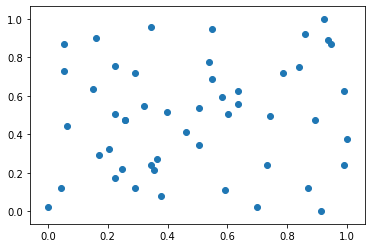

In [95]:
plt.scatter(X[:,0], X[:,1] )
plt.show()

In [96]:
# 第0列的均值
np.mean(X[:,0])

0.4939784946236559

In [97]:
np.std(X[:,0])

0.2974311724535479

In [98]:
# 第1列的均值
np.mean(X[:,1])

0.4888888888888889

In [99]:
np.std(X[:,1])

0.2821492570335192

## 均方差归一化 standardization

In [100]:
X2 = np.random.randint(0, 100, (50,2))
X2 = np.array(X2, dtype=float)

In [102]:
X2[:,0] = (X2[:,0] - np.mean(X2[:,0])) / np.std(X2[:,0])

In [103]:
X2[:,1] = (X2[:,1] - np.mean(X2[:,1])) / np.std(X2[:1])

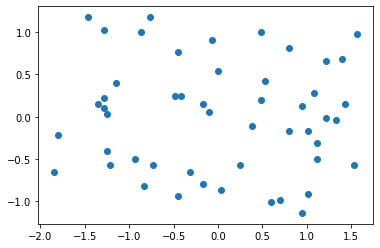

In [105]:
plt.scatter(X2[:,0], X2[:,1])
plt.show()

In [106]:
np.mean(X2[:,0])

-3.9968028886505634e-17

In [109]:
np.std(X2[:,])

0.8415381925926326

In [110]:
np.mean(X2[:,1])

2.1718737919229624e-17

In [111]:
np.std(X2[:,1])

0.6452697569111309

## 对测试数据集如何归一化


<div align="center"><img width="400px" src="imgs/knn-测试数据集归一化.PNG"></div>

<div align="center"><img width="400px" src="imgs/knn-测试数据集归一化思路.PNG"></div>

## Sklearn中的Scaler

In [112]:
import numpy as np
from sklearn import datasets

In [113]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [114]:
X[:10,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [115]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

### StandardScaler

In [116]:
from sklearn.preprocessing import StandardScaler

In [117]:
standardScaler = StandardScaler()

In [118]:
standardScaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [120]:
# 均值
standardScaler.mean_

array([5.83416667, 3.08666667, 3.70833333, 1.17      ])

In [123]:
# 方差（描述数据的缝补范围）
standardScaler.scale_

array([0.81019502, 0.44327067, 1.76401924, 0.75317107])

In [135]:
X_train = standardScaler.transform(X_train)

In [136]:
X_test_standard = standardScaler.transform(X_test)

In [137]:
from sklearn.neighbors import KNeighborsClassifier

In [138]:
knn_clf = KNeighborsClassifier(n_neighbors=3)

In [139]:
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

# KNN解决回归问题
knn可以解决回归问题，sklearn也封装了相应的方法

## 缺点
1. 最大的缺点： 效率低下

如果训练集有m个样本，n个特征，则预测每一个新的数据，需要O(m*n)

优化，使用树结构： KD-tree, Ball-Tree

2. 高度数据相关
    
3. 预测的结果不具有可解释性

4. 维数灾难

<div align="center"><img width="400px" src="imgs/knn-机器学习流程回顾.PNG"></div>